In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Data Generation

In [23]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
print(xs.shape)
print(zs.shape)

generated_inputs = np.column_stack((xs,zs))
print(generated_inputs[:2])

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro',inputs=generated_inputs, targets=generated_targets)

(1000, 1)
(1000, 1)
[[-1.8452498  -4.34427029]
 [-1.66360532  6.41772426]]


#### Solving with TensorFlow

In [24]:
training_data = np.load('TF_intro.npz')

In [25]:
input_size = 2
output_size = 1

# model
'''
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)  
                            ])
'''
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                                                    kernel_initializer =tf.random_uniform_initializer(minval=-0.1,maxval=0.1),
                                                    bias_initializer = tf.random_uniform_initializer(minval=-0.1,maxval=0.1)
                            )  
                            ])
# object function = loss, optimization

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
#model.compile(optimizer ='sgd',loss='mean_squared_error')    # sgd => Stochastic Gradient Descent

model.compile(optimizer =custom_optimizer,loss='mean_squared_error')
# fitting the model to data
model.fit(training_data['inputs'],training_data['targets'],epochs=100,verbose=2)

Train on 1000 samples
Epoch 1/100
1000/1000 - 1s - loss: 20.4552
Epoch 2/100
1000/1000 - 0s - loss: 1.2782
Epoch 3/100
1000/1000 - 0s - loss: 0.4331
Epoch 4/100
1000/1000 - 0s - loss: 0.3843
Epoch 5/100
1000/1000 - 0s - loss: 0.3988
Epoch 6/100
1000/1000 - 0s - loss: 0.4173
Epoch 7/100
1000/1000 - 0s - loss: 0.3750
Epoch 8/100
1000/1000 - 0s - loss: 0.4043
Epoch 9/100
1000/1000 - 0s - loss: 0.3827
Epoch 10/100
1000/1000 - 0s - loss: 0.3841
Epoch 11/100
1000/1000 - 0s - loss: 0.3688
Epoch 12/100
1000/1000 - 0s - loss: 0.4039
Epoch 13/100
1000/1000 - 0s - loss: 0.3691
Epoch 14/100
1000/1000 - 0s - loss: 0.4167
Epoch 15/100
1000/1000 - 0s - loss: 0.3693
Epoch 16/100
1000/1000 - 0s - loss: 0.3768
Epoch 17/100
1000/1000 - 0s - loss: 0.3663
Epoch 18/100
1000/1000 - 0s - loss: 0.3809
Epoch 19/100
1000/1000 - 0s - loss: 0.3712
Epoch 20/100
1000/1000 - 0s - loss: 0.3879
Epoch 21/100
1000/1000 - 0s - loss: 0.3947
Epoch 22/100
1000/1000 - 0s - loss: 0.3711
Epoch 23/100
1000/1000 - 0s - loss: 0.38

output = np.dot(inputs,weights) + bias
* `tf.keras.layers.Dense(output size)` takes the inputs provided to the model and calculates the dot product of the inputs and the weights and adds the bias -> also applies activation function(optional)
* `model.compile(optimizer,loss)` configures the model for training -> l2-norm loss = Least sum of squares(least sum of squared error)
* `Epoch` = iteration over the full dataset
* `verbose` = 0(stands for 'silent' or no output about the training is displayed), 1(for 'progress bar'), 2 (for 'one line per epoch')


#### Extract the weights and bias

In [26]:
model.layers[0].get_weights()

[array([[ 1.9765515],
        [-3.076067 ]], dtype=float32), array([5.0197763], dtype=float32)]

In [27]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print(f"Predicted weights = {weights[0]},{weights[1]}")
print("Predicted bias = ",bias)

Predicted weights = [1.9765515],[-3.076067]
Predicted bias =  [5.0197763]


#### Extract the outputs (make predictions)

In [28]:
predicted_values =model.predict_on_batch(training_data['inputs']).round(1)
predicted_values[:5]

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'round'

In [29]:
predicted_values = np.array(model.predict_on_batch(training_data['inputs']))
predicted_values.round(1)[:5]

array([[ 14.7],
       [-18. ],
       [  4.1],
       [ 10.8],
       [ 49.4]], dtype=float32)

In [30]:
# targets/ original
training_data['targets'].round(1)[:5]

array([[ 14.9],
       [-17.3],
       [  3.5],
       [  9.7],
       [ 47.9]])

#### PLotting the data

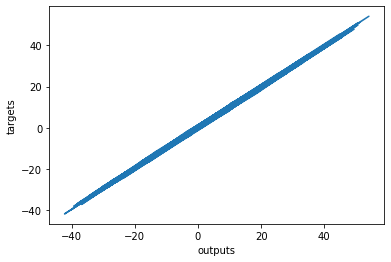

In [31]:

plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])),np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

##### MNIST Data Classification

***Steps***
1. Prepare our data and preprocess it. Create training, validation and test datasets
2. Outline the model and choose the activate functions
3. Set the appropriate advanced optimizers and the loss function
4. Make it learn
5. Test the accuracy of the model

In [45]:
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

In [46]:
mnist_datasets,mnist_info = tfds.load(name='mnist',with_info=True,as_supervised=True)

In [47]:
mnist_train,mnist_test = mnist_datasets['train'],mnist_datasets['test']

# Validation percentage
num_validation_samples = 0.1 * mnist_info.splits['train'].num_examples
# casts a variable into a given type
num_validation_samples = tf.cast(num_validation_samples,tf.int64)

# test
num_test_samples = mnist_info.splits['test'].num_examples
num_test_samples = tf.cast(num_test_samples,tf.int64)

In [48]:
# scaling the datasets
def scale(image,label):
    image = tf.cast(image,tf.float32)
    image /=255.   # . represent the final output is float
    return image, label    

In [49]:
scaled_train_and_validation_data = mnist_train.map(scale)
test_data = mnist_test.map(scale)

In [50]:
# Shuffle the data
BUFFER_SIZE = 10000 # taking 10000 samples

shuffle_train_and_validation_data = scaled_train_and_validation_data.shuffle(BUFFER_SIZE)
# Validation datasets
validation_data = shuffle_train_and_validation_data.take(num_validation_samples)
# train datasets
train_data = shuffle_train_and_validation_data.skip(num_validation_samples)

> * if buffer_size =1 , no shuffling will actually happen
* if butter_size >=num_samples, shuffling will happen at once(uniformly)
* if 1< buffer_size < num_samples, we will be optimizing the computational power

In [51]:
# batching for backward propagation
BATCH_SIZE = 100

train_data = train_data.batch(BATCH_SIZE)

validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(num_test_samples)

validation_inputs, validation_targets = next(iter(validation_data))

* `iter()` creates an object which can be iterated one element at a time(e.g. in a for loop or while loop)
* `next()` loads the next element of an iterable object

> * batch_size = 1 = Stochastic gradient descent(SGD)
* batch_size = # samples = (single batch) GD
* 1< batch _size < # samples = mini-batch GD

#### Model
outline the Model

In [58]:
input_size = 784
output_size = 10
hidden_layer_size = 100 #50

In [59]:
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_size(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(output_size,activation='softmax')
                            ])

TypeError: 'int' object is not callable

`tf.keras.layers.Flattten(original shape)` transforms((Flattens)) a tensor into a vector

In [60]:
model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                            tf.keras.layers.Dense(output_size,activation='softmax')
                            ])

#### Choose the optimizer and the loss function

In [61]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

***loss function***
* `categorical_crossentropy` -> expects that you've one-hot encoded the targets
* `sparse_catergorical_crossentropy` -> applies one-hot encoding

#### Training

In [62]:
NUM_EPOCHS = 5

model.fit(train_data,epochs=NUM_EPOCHS,validation_data=(validation_inputs,validation_targets),verbose=2)

ValueError: `batch_size` or `steps` is required for `Tensor` or `NumPy` input data.

In [63]:
NUM_EPOCHS = 5
#must define validation steps
VALIDATION_STEPS = num_validation_samples
model.fit(train_data,epochs=NUM_EPOCHS,
          validation_data=(validation_inputs,validation_targets),
          validation_steps=VALIDATION_STEPS,
          verbose=2)

Epoch 1/5
540/540 - 10s - loss: 0.3181 - accuracy: 0.9095 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
540/540 - 9s - loss: 0.1329 - accuracy: 0.9599 - val_loss: 0.1309 - val_accuracy: 0.9618
Epoch 3/5
540/540 - 9s - loss: 0.0943 - accuracy: 0.9713 - val_loss: 0.0918 - val_accuracy: 0.9743
Epoch 4/5
540/540 - 9s - loss: 0.0721 - accuracy: 0.9778 - val_loss: 0.0896 - val_accuracy: 0.9737
Epoch 5/5
540/540 - 10s - loss: 0.0585 - accuracy: 0.9820 - val_loss: 0.0716 - val_accuracy: 0.9787


#### Test the model

In [64]:
test_loss, test_accuracy = model.evaluate(test_data)

1/1 [==============================] - 1s 644ms/step - loss: 0.0940 - accuracy: 0.9723


In [ ]:
print('Test loss: {)}')